<a href="https://colab.research.google.com/github/italo1055380/Projeto-Enceja-Data-Mind/blob/main/Enceja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:

import pandas as pd
from matplotlib import pyplot
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

#Fazendo o carregamento dos dados  
        
df = pd.read_csv("/content/drive/MyDrive/MICRODADOS_ENCCEJA_2022_REG_NAC.csv",sep=";", encoding = "ISO-8859-1")


In [15]:
print("Primeiros dados")
print(df.head(5))

Primeiros dados
   NU_INSCRICAO  NU_ANO  TP_CERTIFICACAO  TP_FAIXA_ETARIA TP_SEXO  \
0  200004884438    2022                2               15       M   
1  200004783444    2022                2               11       M   
2  200003542579    2022                2               13       M   
3  200004855636    2022                2               11       M   
4  200004773132    2022                2               13       M   

   CO_UF_PROVA SG_UF_PROVA                          NO_ENTIDADE_CERTIFICADORA  \
0           53          DF  INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...   
1           52          GO  INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...   
2           35          SP      SECRETARIA DE ESTADO DE EDUCAÇÃO DE SÃO PAULO   
3           15          PA           SECRETARIA DE ESTADO DE EDUCAÇÃO DO PARÁ   
4           42          SC  INSTITUTO FEDERAL DE EDUCAÇÃO CIÊNCIA E TECNOL...   

   IN_PROVA_LC  IN_PROVA_MT  ...  Q53  Q54  Q55  Q56  Q57  Q58  Q59  Q60  Q61  \
0

In [16]:
print()
print("##### Informações do Dataset ####")
df.info()


##### Informações do Dataset ####
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683134 entries, 0 to 1683133
Columns: 105 entries, NU_INSCRICAO to Q62
dtypes: float64(23), int64(9), object(73)
memory usage: 1.3+ GB


In [17]:
print()
print("#### Verificando se há NaN ou NULL ####")

nan_rows  = df[df.isna().any(axis=1)]
null_rows  = df[df.isnull().any(axis=1)]
print(f"NaN: {len(nan_rows)}")
print(f"Null: {len(null_rows)}")


#### Verificando se há NaN ou NULL ####
NaN: 1683134
Null: 1683134


In [ ]:
#print("#### Removendo as colunas de ID")
#df = df.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis = 1)
#df.info()

In [18]:
print("#### Estatísticas dos Dados ####")
display(df.describe().round(2))

#### Estatísticas dos Dados ####


,NU_INSCRICAO,NU_ANO,TP_CERTIFICACAO,TP_FAIXA_ETARIA,CO_UF_PROVA,IN_PROVA_LC,IN_PROVA_MT,IN_PROVA_CN,IN_PROVA_CH,TP_PRESENCA_LC,...,IN_APROVADO_MT,IN_APROVADO_CN,IN_APROVADO_CH,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,1.683134e+06,1683134.0,1683134.00,1683134.00,1683134.00,1683134.00,1683134.00,1683134.00,1683134.00,1415505.00,...,474462.00,414195.00,434818.0,447307.0,447307.00,447307.00,447307.00,447307.00,391408.00,447307.00
mean,2.000041e+11,2022.0,1.82,10.18,34.19,0.84,0.87,0.82,0.83,0.32,...,0.62,0.92,0.9,1.5,1.00,1.10,1.00,1.15,1.32,5.41
std,4.868119e+05,0.0,0.39,3.83,9.68,0.37,0.34,0.38,0.37,0.47,...,0.48,0.28,0.3,1.4,0.45,0.51,0.44,0.49,0.71,2.29
min,2.000032e+11,2022.0,1.00,1.00,11.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.000036e+11,2022.0,2.00,7.00,29.00,1.00,1.00,1.00,1.00,0.00,...,0.00,1.00,1.0,1.0,0.80,1.00,1.00,1.00,0.80,5.00
50%,2.000041e+11,2022.0,2.00,11.00,33.00,1.00,1.00,1.00,1.00,0.00,...,1.00,1.00,1.0,1.0,1.20,1.20,1.20,1.20,1.60,6.20
75%,2.000045e+11,2022.0,2.00,13.00,41.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.0,1.20,1.40,1.20,1.40,1.80,6.80
max,2.000050e+11,2022.0,2.00,20.00,53.00,1.00,1.00,1.00,1.00,2.00,...,1.00,1.00,1.0,9.0,2.50,2.50,2.50,2.50,2.00,10.00


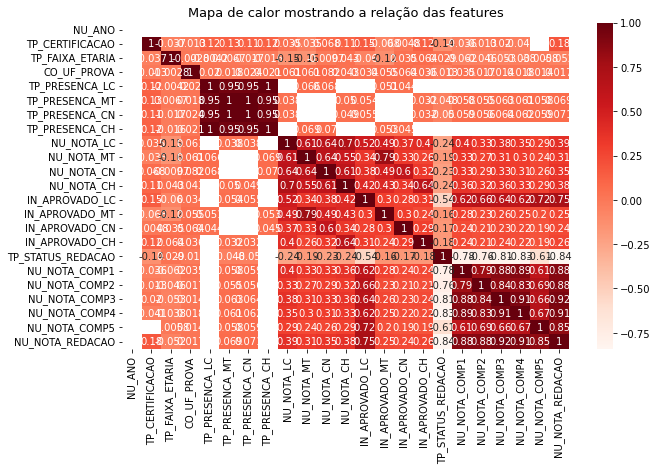

In [29]:
pyplot.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=pyplot.cm.Reds,annot=True)
pyplot.title('Mapa de calor mostrando a relação das features',
         fontsize=13)
pyplot.show()

In [ ]:
print("#### Removendo as coluna NU_INSCRICAO")
df = df.drop(['NU_INSCRICAO'], axis=1)
df.info()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683134 entries, 0 to 1683133
Columns: 104 entries, NU_ANO to Q62
dtypes: float64(23), int64(8), object(73)
memory usage: 1.3+ GB


print("#### Removendo as colunas CO_PROVA_LC,CO_PROVA_MT, CO_PROVA_CN, CO_PROVA_CH")
df = df.drop(['CO_PROVA_LC','CO_PROVA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH'], axis=1)


In [28]:
print("#### Removendo as colunas IN_PROVA_LC,IN_PROVA_MT, IN_PROVA_CN, IN_PROVA_CH")
df = df.drop(['IN_PROVA_LC','IN_PROVA_MT', 'IN_PROVA_CN', 'IN_PROVA_CH'], axis=1)
df.info()

#### Removendo as colunas IN_PROVA_LC,IN_PROVA_MT, IN_PROVA_CN, IN_PROVA_CH
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683134 entries, 0 to 1683133
Data columns (total 96 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   NU_ANO                     1683134 non-null  int64  
 1   TP_CERTIFICACAO            1683134 non-null  int64  
 2   TP_FAIXA_ETARIA            1683134 non-null  int64  
 3   TP_SEXO                    1683134 non-null  object 
 4   CO_UF_PROVA                1683134 non-null  int64  
 5   SG_UF_PROVA                1683134 non-null  object 
 6   NO_ENTIDADE_CERTIFICADORA  1683134 non-null  object 
 7   TP_PRESENCA_LC             1415505 non-null  float64
 8   TP_PRESENCA_MT             1456996 non-null  float64
 9   TP_PRESENCA_CN             1385466 non-null  float64
 10  TP_PRESENCA_CH             1401618 non-null  float64
 11  NU_NOTA_LC                 447307 non-null   float64

In [30]:
print("#### Removendo as colunas TP_PRESENCA_LC,TP_PRESENCA_CH, TP_PRESENCA_CN, TP_PRESENCA_MT")
df = df.drop(['TP_PRESENCA_LC','TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_MT'], axis=1)
df.info()

#### Removendo as colunas TP_PRESENCA_LC,TP_PRESENCA_CH, TP_PRESENCA_CN, TP_PRESENCA_MT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683134 entries, 0 to 1683133
Data columns (total 92 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   NU_ANO                     1683134 non-null  int64  
 1   TP_CERTIFICACAO            1683134 non-null  int64  
 2   TP_FAIXA_ETARIA            1683134 non-null  int64  
 3   TP_SEXO                    1683134 non-null  object 
 4   CO_UF_PROVA                1683134 non-null  int64  
 5   SG_UF_PROVA                1683134 non-null  object 
 6   NO_ENTIDADE_CERTIFICADORA  1683134 non-null  object 
 7   NU_NOTA_LC                 447307 non-null   float64
 8   NU_NOTA_MT                 474462 non-null   float64
 9   NU_NOTA_CN                 414195 non-null   float64
 10  NU_NOTA_CH                 434818 non-null   float64
 11  IN_APROVADO_LC             447307 non-nu

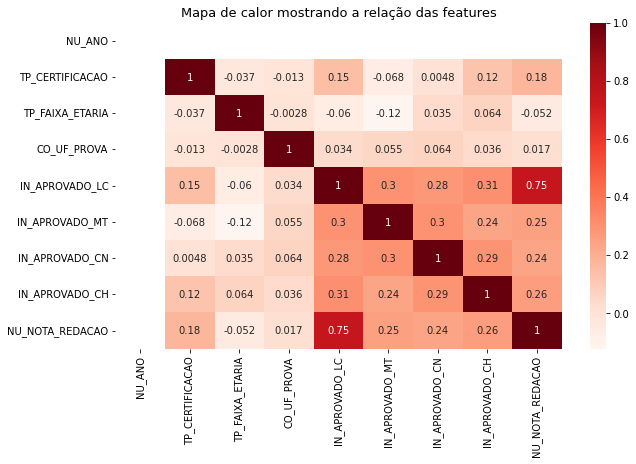

In [39]:
pyplot.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=pyplot.cm.Reds,annot=True)
pyplot.title('Mapa de calor mostrando a relação das features',
         fontsize=13)
pyplot.show()

In [32]:
print("#### Removendo as colunas NU_NOTA_LC,NU_NOTA_CH, NU_NOTA_CN, NU_NOTA_MT")
df = df.drop(['NU_NOTA_LC','NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT'], axis=1)
df.info()

#### Removendo as colunas NU_NOTA_LC,NU_NOTA_CH, NU_NOTA_CN, NU_NOTA_MT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683134 entries, 0 to 1683133
Data columns (total 88 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   NU_ANO                     1683134 non-null  int64  
 1   TP_CERTIFICACAO            1683134 non-null  int64  
 2   TP_FAIXA_ETARIA            1683134 non-null  int64  
 3   TP_SEXO                    1683134 non-null  object 
 4   CO_UF_PROVA                1683134 non-null  int64  
 5   SG_UF_PROVA                1683134 non-null  object 
 6   NO_ENTIDADE_CERTIFICADORA  1683134 non-null  object 
 7   IN_APROVADO_LC             447307 non-null   float64
 8   IN_APROVADO_MT             474462 non-null   float64
 9   IN_APROVADO_CN             414195 non-null   float64
 10  IN_APROVADO_CH             434818 non-null   float64
 11  TX_RESPOSTAS_LC            447307 non-null   object 
 12

In [34]:
print("#### Removendo a coluna TP_STATUS_REDACAO")
df = df.drop(['TP_STATUS_REDACAO'], axis=1)
df.info()

#### Removendo a coluna TP_STATUS_REDACAO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683134 entries, 0 to 1683133
Data columns (total 87 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   NU_ANO                     1683134 non-null  int64  
 1   TP_CERTIFICACAO            1683134 non-null  int64  
 2   TP_FAIXA_ETARIA            1683134 non-null  int64  
 3   TP_SEXO                    1683134 non-null  object 
 4   CO_UF_PROVA                1683134 non-null  int64  
 5   SG_UF_PROVA                1683134 non-null  object 
 6   NO_ENTIDADE_CERTIFICADORA  1683134 non-null  object 
 7   IN_APROVADO_LC             447307 non-null   float64
 8   IN_APROVADO_MT             474462 non-null   float64
 9   IN_APROVADO_CN             414195 non-null   float64
 10  IN_APROVADO_CH             434818 non-null   float64
 11  TX_RESPOSTAS_LC            447307 non-null   object 
 12  TX_RESPOSTAS_MT            4

In [38]:
print("#### Removendo as colunas NU_NOTA_COMP5")
df = df.drop(['NU_NOTA_COMP5'], axis=1)
df.info()

#### Removendo as colunas NU_NOTA_COMP5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683134 entries, 0 to 1683133
Data columns (total 82 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   NU_ANO                     1683134 non-null  int64  
 1   TP_CERTIFICACAO            1683134 non-null  int64  
 2   TP_FAIXA_ETARIA            1683134 non-null  int64  
 3   TP_SEXO                    1683134 non-null  object 
 4   CO_UF_PROVA                1683134 non-null  int64  
 5   SG_UF_PROVA                1683134 non-null  object 
 6   NO_ENTIDADE_CERTIFICADORA  1683134 non-null  object 
 7   IN_APROVADO_LC             447307 non-null   float64
 8   IN_APROVADO_MT             474462 non-null   float64
 9   IN_APROVADO_CN             414195 non-null   float64
 10  IN_APROVADO_CH             434818 non-null   float64
 11  TX_RESPOSTAS_LC            447307 non-null   object 
 12  TX_RESPOSTAS_MT            474